In [1]:
!pip install scikit-learn pandas numpy matplotlib seaborn tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]

# Encode the target variable from 'No'/'Yes' to 0/1
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Impute missing values after one-hot encoding
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.25, random_state=42
)

In [7]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)

    print(f"\n===== {model_name} =====")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))
    print("\nClassification Report:\n", classification_report(y_test, preds))

    return acc, prec, rec


In [13]:
nb = GaussianNB()
evaluate_model(nb, X_train, X_test, y_train, y_test, "Naive Bayes")



===== Naive Bayes =====
Accuracy: 0.8076
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2019    0]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

(0.8076, 0.0, 0.0)


===== KNN (k=1) =====
Accuracy: 0.682
Precision: 0.18725099601593626
Recall: 0.19542619542619544

Confusion Matrix:
 [[1611  408]
 [ 387   94]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      2019
           1       0.19      0.20      0.19       481

    accuracy                           0.68      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.69      0.68      0.68      2500


===== KNN (k=2) =====
Accuracy: 0.778
Precision: 0.16363636363636364
Recall: 0.037422037422037424

Confusion Matrix:
 [[1927   92]
 [ 463   18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      2019
           1       0.16      0.04      0.06       481

    accuracy                           0.78      2500
   macro avg       0.48      0.50      0.47      2500
weighted avg       0.68      0.78      0.72      2500


====

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


===== KNN (k=18) =====
Accuracy: 0.8076
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2019    0]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500


===== KNN (k=19) =====
Accuracy: 0.8076
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2019    0]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500



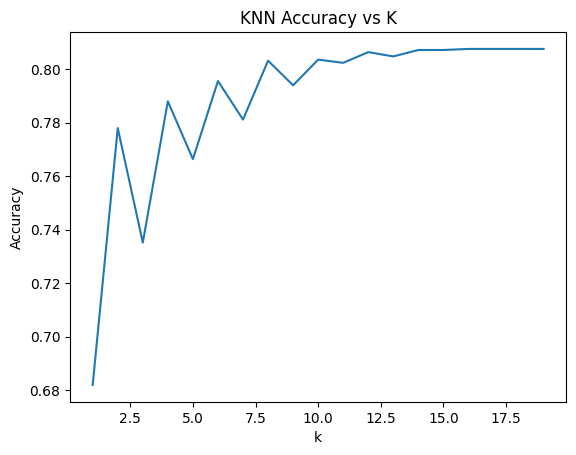

In [14]:
scores_knn = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    acc, _, _ = evaluate_model(knn, X_train, X_test, y_train, y_test, f"KNN (k={k})")
    scores_knn.append(acc)

plt.plot(range(1, 20), scores_knn)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


===== DT depth=1 =====
Accuracy: 0.8076
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2019    0]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500


===== DT depth=2 =====
Accuracy: 0.808
Precision: 1.0
Recall: 0.002079002079002079

Confusion Matrix:
 [[2019    0]
 [ 480    1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       1.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.90      0.50      0.45      2500
weighted avg       0.84      0.81      0.72      2500


===== DT depth=3 =====
Accuracy: 0.8076
Precision

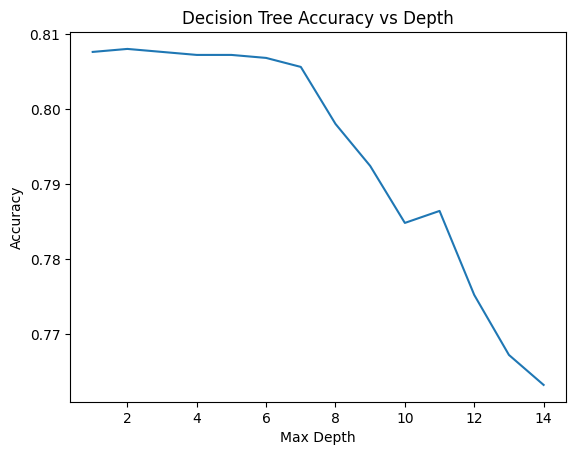

In [16]:
scores_dt = []
depths = range(1, 15)

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    acc, _, _ = evaluate_model(dt, X_train, X_test, y_train, y_test, f"DT depth={d}")
    scores_dt.append(acc)

plt.plot(depths, scores_dt)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs Depth")
plt.show()




===== RF trees=10 =====
Accuracy: 0.798
Precision: 0.14705882352941177
Recall: 0.010395010395010396

Confusion Matrix:
 [[1990   29]
 [ 476    5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      2019
           1       0.15      0.01      0.02       481

    accuracy                           0.80      2500
   macro avg       0.48      0.50      0.45      2500
weighted avg       0.68      0.80      0.72      2500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


===== RF trees=50 =====
Accuracy: 0.8076
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2019    0]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500


===== RF trees=100 =====
Accuracy: 0.8072
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2018    1]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


===== RF trees=150 =====
Accuracy: 0.8076
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2019    0]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500


===== RF trees=200 =====
Accuracy: 0.8076
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2019    0]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

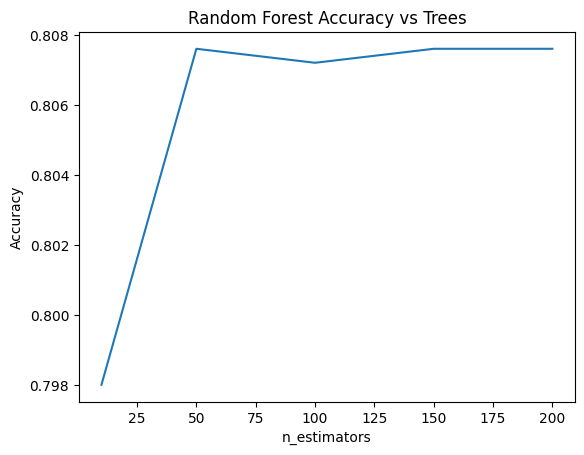

In [17]:
scores_rf = []
trees = [10, 50, 100, 150, 200]

for t in trees:
    rf = RandomForestClassifier(n_estimators=t)
    acc, _, _ = evaluate_model(rf, X_train, X_test, y_train, y_test, f"RF trees={t}")
    scores_rf.append(acc)

plt.plot(trees, scores_rf)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Trees")
plt.show()


In [18]:
logreg = LogisticRegression(max_iter=500)
evaluate_model(logreg, X_train, X_test, y_train, y_test, "Logistic Regression")




===== Logistic Regression =====
Accuracy: 0.8076
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2019    0]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

(0.8076, 0.0, 0.0)

In [19]:
kernels = ["linear", "rbf", "poly"]
for k in kernels:
    svm = SVC(kernel=k)
    evaluate_model(svm, X_train, X_test, y_train, y_test, f"SVM kernel={k}")


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


===== SVM kernel=linear =====
Accuracy: 0.8076
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2019    0]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


===== SVM kernel=rbf =====
Accuracy: 0.8076
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2019    0]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500


===== SVM kernel=poly =====
Accuracy: 0.8068
Precision: 0.0
Recall: 0.0

Confusion Matrix:
 [[2017    2]
 [ 481    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2019
           1       0.00      0.00      0.00       481

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500



In [20]:
ann = Sequential()
ann.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

preds = (ann.predict(X_test) > 0.5).astype("int32")
print("\n===== ANN =====")
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7453 - loss: 0.5599
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7956 - loss: 0.5055
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7924 - loss: 0.5048
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7929 - loss: 0.4972
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7917 - loss: 0.4974
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7829 - loss: 0.5058
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7985 - loss: 0.4821
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7987 - loss: 0.4780
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8081 - loss: 0.4612
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8081 - loss: 0.4597
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8021 - loss: 0.4657
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

print("K-means Cluster Counts:\n", pd.Series(clusters).value_counts())


K-means Cluster Counts:
 1    6668
0    3332
Name: count, dtype: int64


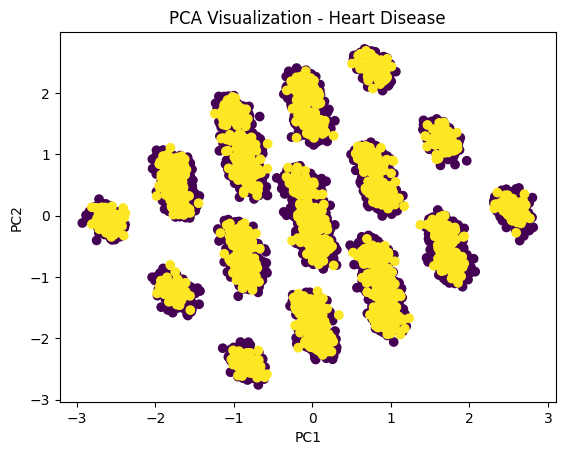

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_encoded, cmap="viridis")
plt.title("PCA Visualization - Heart Disease")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()